# Лабораторная работа
## Ансамбли моделей машинного обучения.
Цель лабораторной работы: изучение ансамблей моделей машинного обучения.

Задание:
Выберите набор данных (датасет) для решения задачи классификации или регресии.

В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

С использованием метода train_test_split разделите выборку на обучающую и тестовую.

Обучите следующие ансамблевые модели:

одну из моделей группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья);
одну из моделей группы бустинга;
одну из моделей группы стекинга.
(+1 балл на экзамене) Дополнительно к указанным моделям обучите еще две модели:

Модель многослойного персептрона. По желанию, вместо библиотеки scikit-learn возможно использование библиотек TensorFlow, PyTorch или других аналогичных библиотек.
Модель МГУА с использованием библиотеки - https://github.com/kvoyager/GmdhPy (или аналогичных библиотек). Найдите такие параметры запуска модели, при которых она будет по крайней мере не хуже, чем одна из предыдущих ансамблевых моделей.
Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./music.csv')
data

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


Предварительная обработка

Удаляем столбцы с пустыми значениями:

In [3]:
data = data.dropna(axis=1, how='any')
data

,Artist Name,Track Name,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),0.854,0.564,-4.964,1,0.0485,0.017100,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,0.382,0.814,-7.230,1,0.0406,0.001100,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,0.434,0.614,-8.334,1,0.0525,0.486000,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),0.853,0.597,-6.528,0,0.0555,0.021200,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,0.167,0.975,-4.279,1,0.2160,0.000169,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,0.166,0.109,-17.100,0,0.0413,0.993000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,0.638,0.223,-10.174,0,0.0329,0.858000,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,0.558,0.981,-4.683,0,0.0712,0.000030,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,0.215,0.805,-12.757,0,0.1340,0.001290,0.2560,0.3550,131.363,219693.0,4,8


In [4]:
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    if null_count == 0:
        column_type = data[col].dtype
        print('{} - {} - {}'.format(col, column_type, null_count))

Artist Name - object - 0
Track Name - object - 0
danceability - float64 - 0
energy - float64 - 0
loudness - float64 - 0
mode - int64 - 0
speechiness - float64 - 0
acousticness - float64 - 0
liveness - float64 - 0
valence - float64 - 0
tempo - float64 - 0
duration_in min/ms - float64 - 0
time_signature - int64 - 0
Class - int64 - 0


Категориальные признаки:

In [5]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

Artist Name
Track Name


In [6]:
le1 = LabelEncoder()
data['Track Name'] = le1.fit_transform(data['Track Name']);

In [7]:
le2 = LabelEncoder()
data['Artist Name'] = le2.fit_transform(data['Artist Name']);

In [8]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

## Разделение выборки на обучающую и тестовую

In [9]:
from sklearn.model_selection import train_test_split

data_x = data.loc[:, data.columns != 'Class']
data_y = data['Class']

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3, random_state=1)

In [10]:
train_x.shape

(12597, 13)

In [11]:
test_x.shape

(5399, 13)

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score

def test_model(model):
    print('mean_absolute_error: {}'.format(round(mean_absolute_error(test_y, model.predict(test_x)), 2)))
    print('median_absolute_error: {}'.format(round(median_absolute_error(test_y, model.predict(test_x)), 2)))
    print('r2_score: {}'.format(round(r2_score(test_y, model.predict(test_x)), 2)))

## Обучение моделей

### Случайный лес

In [13]:
from sklearn.ensemble import RandomForestRegressor

ran_80 = RandomForestRegressor(n_estimators=80)
ran_80.fit(train_x, train_y)

RandomForestRegressor(n_estimators=80)

In [14]:
test_model(ran_80)

mean_absolute_error: 2.32
median_absolute_error: 1.98
r2_score: 0.14


In [15]:
param_range = np.arange(50, 170, 10)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}]

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}],
             return_train_score=True, scoring='r2')

In [17]:
reg = gs.best_estimator_

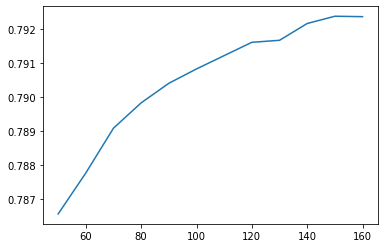

In [18]:
import matplotlib.pyplot as plt

plt.plot(param_range, gs.cv_results_["mean_train_score"]);

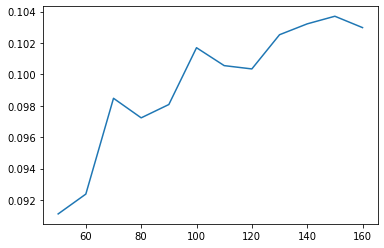

In [19]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [20]:
reg.fit(train_x, train_y)
test_model(reg)

mean_absolute_error: 2.31
median_absolute_error: 1.99
r2_score: 0.14


### Градиентный бустинг

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

gr_80 = GradientBoostingRegressor(n_estimators=80)
gr_80.fit(train_x, train_y)

GradientBoostingRegressor(n_estimators=80)

In [22]:
test_model(gr_80)

mean_absolute_error: 2.29
median_absolute_error: 2.13
r2_score: 0.21


In [23]:
gs = GridSearchCV(GradientBoostingRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}],
             return_train_score=True, scoring='r2')

In [24]:
reg = gs.best_estimator_

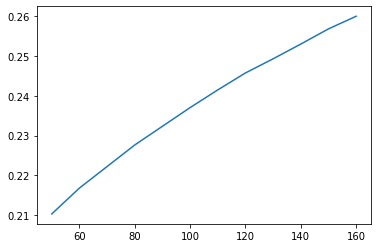

In [25]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

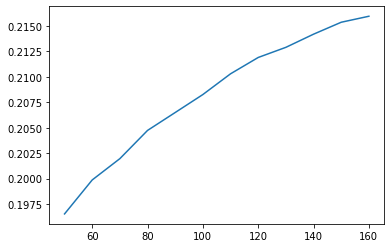

In [26]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [27]:
reg.fit(train_x, train_y)
test_model(reg)

mean_absolute_error: 2.26
median_absolute_error: 2.07
r2_score: 0.22
